In [1]:
import json

with open('results.json') as f:
    results = json.load(f)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def plot_instances(features):
    fig, axes = plt.subplots(1, 10)
    fig.set_size_inches(30, 5)
    for i, ax in enumerate(axes):
        image = plt.imread(features[i][0])
        label = features[i][1]
        # image = image / 255.0
        ax.set_title(f"{label}")
        ax.imshow(image)
        ax.set_axis_off()
    plt.show()

In [4]:
def visualize_concept(concept_id=0):
    print(f"Concept #{concept_id}")
    print()
    pair = results[concept_id]
    print(pair["concept"])
    plot_instances(pair["feature"])

Concept #0

[['right', 0.18430297154067063], ['shape', 0.13962309910110665], ['position', 0.11323319921890894], ['canvas', 0.10730119778454142], ['rotate', 0.09510587827525044], ['up', 0.09044152943234149], ['white', 0.08966354825352252], ['blank', 0.0811557920626124], ['left', 0.08064071079706375], ['bottom', 0.07549439534069212]]


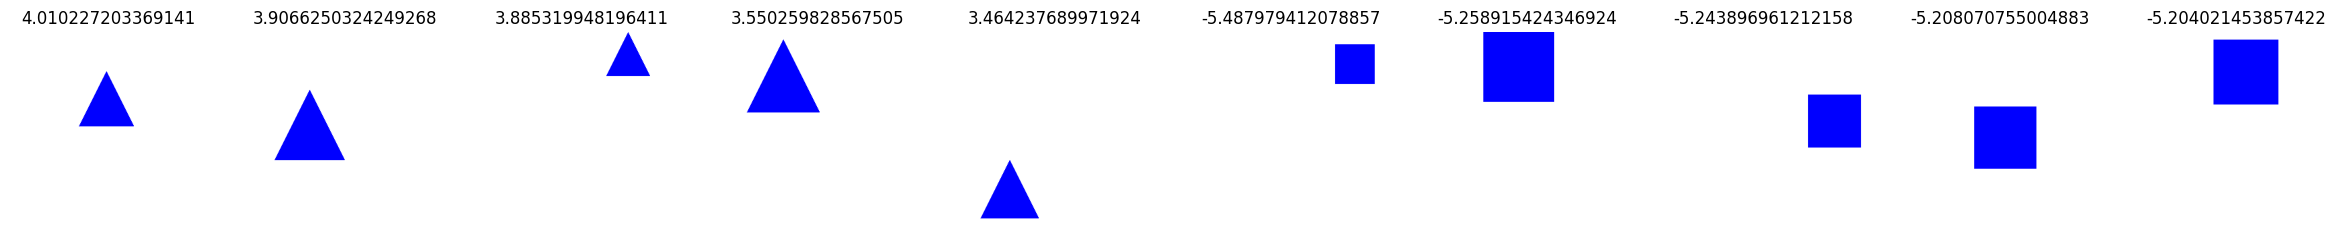

Concept #1

[['white', 0.19639773293564697], ['green', 0.18732732372070715], ['blank', 0.15426412594304703], ['bottom', 0.13910800569242845], ['right', 0.12483907066302428], ['angle', 0.10272414635836594], ['<pad>', 0.10059692142455559], ['four', 0.09745785425591275], ['left', 0.09390079625129576], ['blue', 0.09354336390771517]]


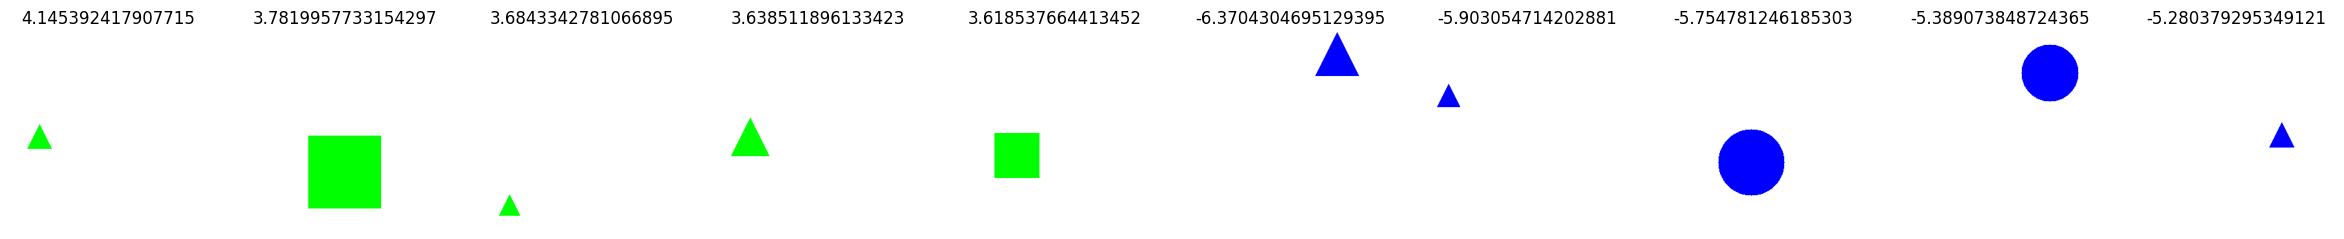

Concept #2

[['red', 0.32497535393974647], ['blue', 0.24900469274782552], ['green', 0.22213024526107603], ['color', 0.2028175551414005], ['shape', 0.13648846800007472], ['three', 0.10708661599130165], ['round', 0.0918100192416005], ['four', 0.08747292341497856], ['blank', 0.07894524700092805], ['position', 0.06221074729875174]]


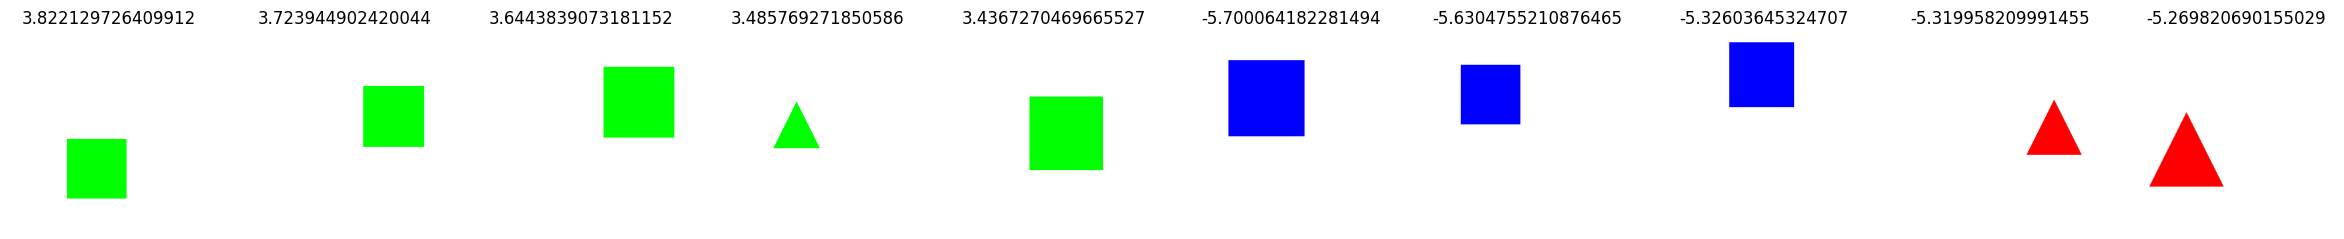

Concept #3

[['color', 0.15915196785920357], ['left', 0.12066340476771714], ['shape', 0.10575019597280316], ['has', 0.10071625154071707], ['bottom', 0.09828415648085204], ['is', 0.09605668441551488], ['right', 0.08818053754370314], ['blue', 0.08702834361210102], ['three', 0.086646543855105], ['rotate', 0.07825088711966456]]


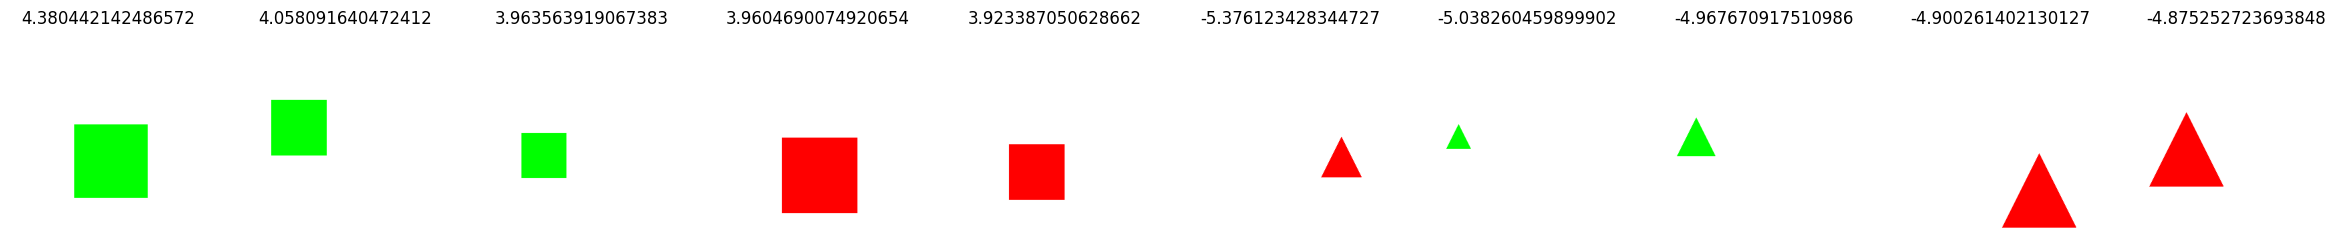

Concept #4

[['this', 0.6848774403091369], ['shape', 0.0938669252888297], ['left', 0.06671674137039652], ['blank', 0.05264059203568885], ['unrotate', 0.03060564242984296], ['canvas', 0.02668401229127151], ['three', 0.023540910923989807], ['angle', 0.023018439348817355], ['white', 0.020199359815330598], ['bottom', 0.017113891975948422]]


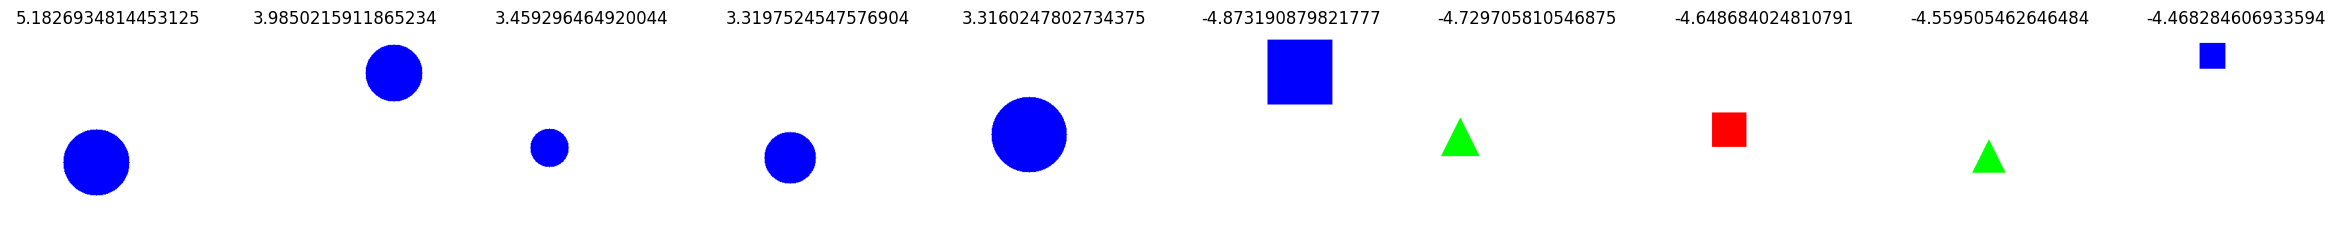

Concept #5

[['blue', 0.23837160264573445], ['angle', 0.19837631044106754], ['left', 0.15320867020345455], ['red', 0.10944722591619181], ['bottom', 0.1061634123785734], ['right', 0.10131160085747527], ['up', 0.09157349393453697], ['color', 0.07947751872019393], ['blank', 0.07936423678211996], ['position', 0.0770358940995321]]


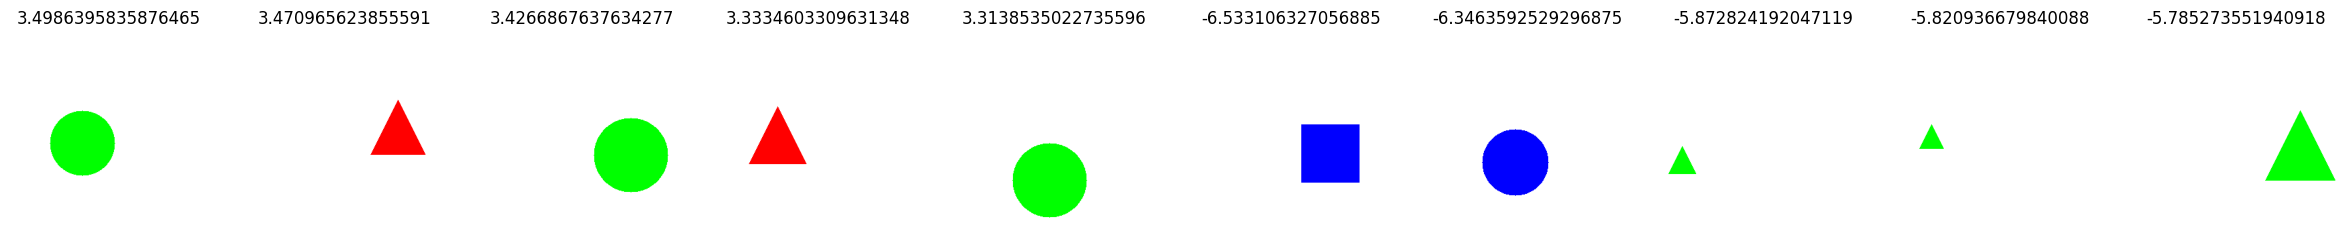

Concept #6

[['this', 0.21026514642606906], ['position', 0.20948610823894256], ['rotate', 0.17971601342963697], ['left', 0.0940400939959182], ['right', 0.08899483076689878], ['up', 0.08574496722807873], ['unrotate', 0.08151964800913326], ['canvas', 0.07343369966478852], ['blank', 0.06327651260179028], ['shape', 0.05668337155527216]]


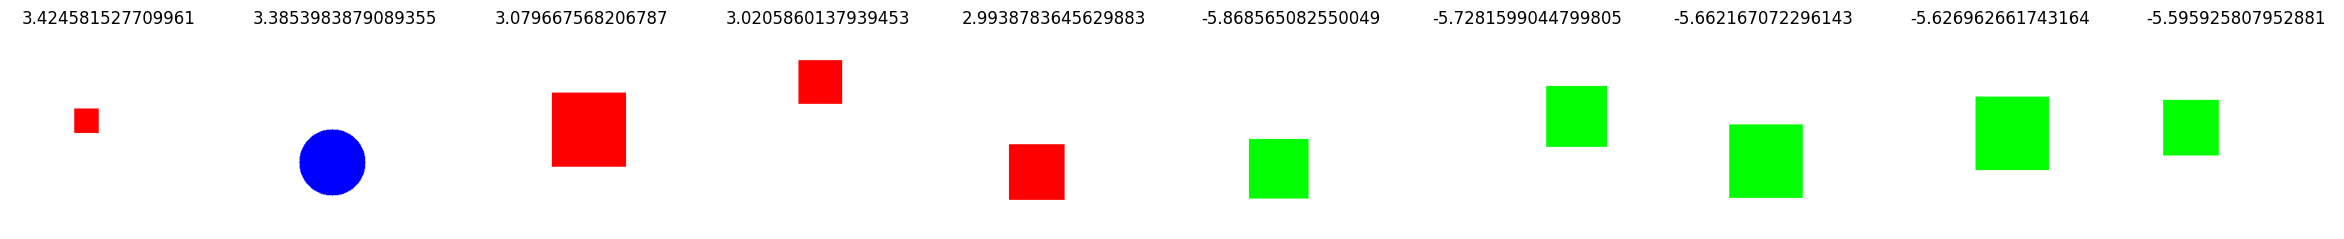

Concept #7

[['green', 0.623862135555686], ['blue', 0.18660518583970342], ['color', 0.13206183603260574], ['this', 0.12548464380184488], ['rotate', 0.08731114194085575], ['four', 0.08342167101194703], ['unrotate', 0.07704253349449251], ['red', 0.07617501750497556], ['<pad>', 0.06470549408861292], ['blank', 0.060389770327475945]]


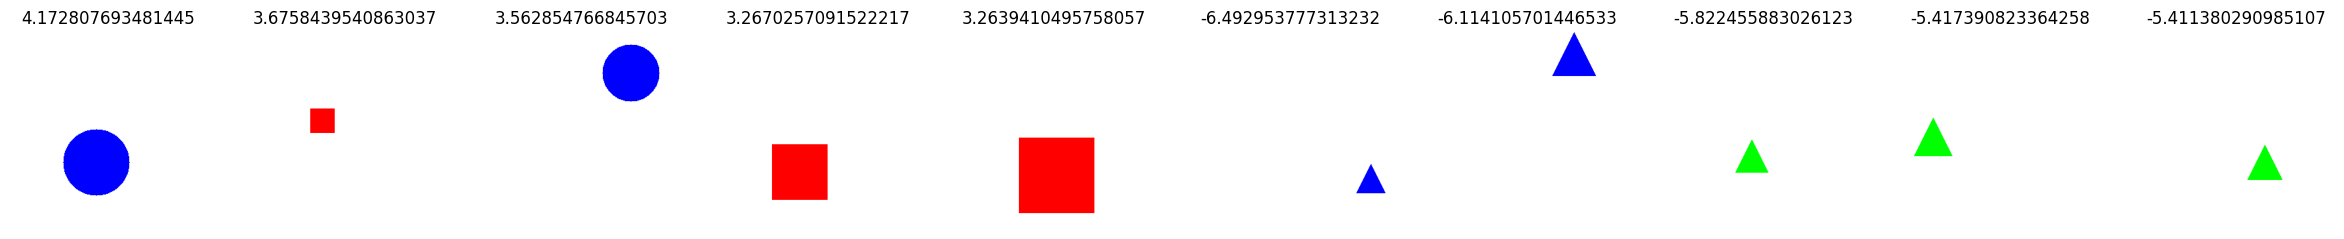

Concept #8

[['is', 0.3036490102124408], ['has', 0.21125146161492278], ['color', 0.12180558887277515], ['green', 0.11424283836551798], ['red', 0.110393944849086], ['blue', 0.10528314036688184], ['unrotate', 0.08603973128495383], ['position', 0.08094464747644052], ['left', 0.07798543289630082], ['rotate', 0.07155980140926828]]


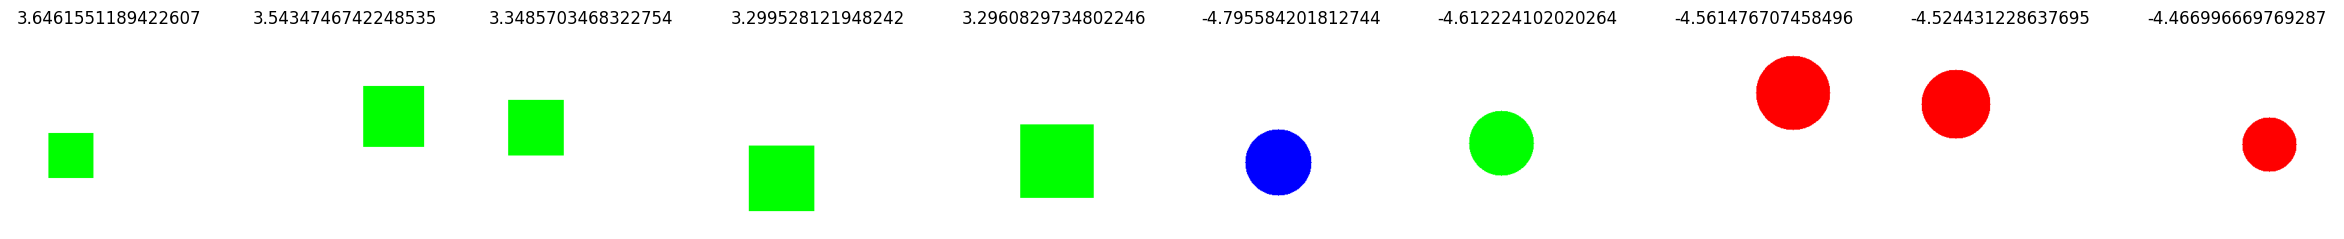

Concept #9

[['shape', 0.17117812450177625], ['position', 0.12215703583668241], ['rotate', 0.10797847424164018], ['canvas', 0.10771820854930697], ['blank', 0.09870310918129681], ['blue', 0.08888880933324496], ['left', 0.08651243604338953], ['color', 0.0772774842393592], ['red', 0.07445476013955062], ['three', 0.07061744878689448]]


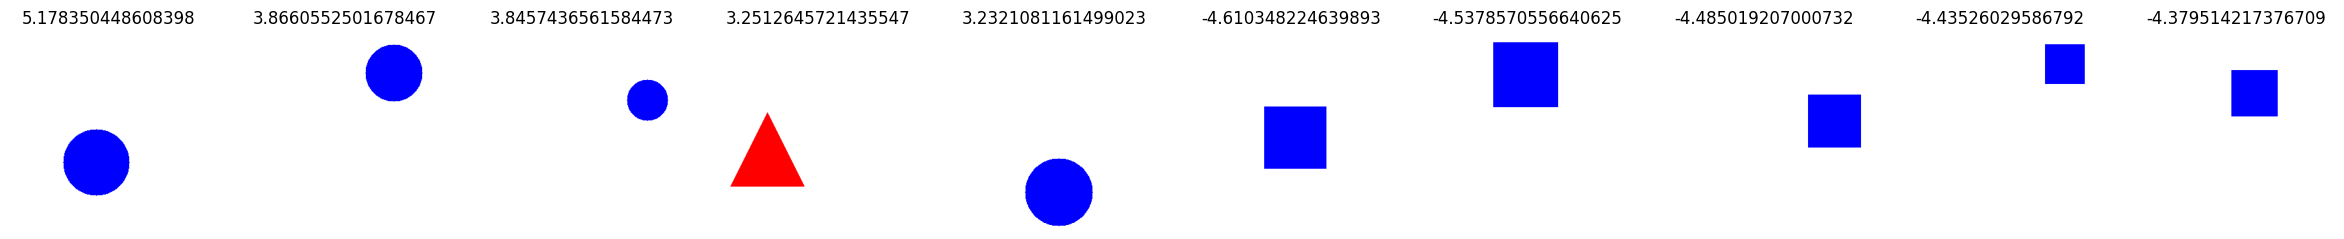

In [5]:
for i in range(10):
    visualize_concept(i)